# importing necessary libraries

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy import stats 
from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
#from xgboost import XGBClassifier
#from xgboost.sklearn import XGBRegressor
# from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor, RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
#import xgboost as xgb

## Meaning of columns
>Row ID => Unique ID for each row.\
>Order ID => Unique Order ID for each Customer.\
>Order Date => Order Date of the product.\
>Ship Date => Shipping Date of the Product.\
>Ship Mode=> Shipping Mode specified by the Customer.\
>Customer ID => Unique ID to identify each Customer.\
>Customer Name => Name of the Customer.\
>Segment => The segment where the Customer belongs.\
>Country => Country of residence of the Customer.\
>City => City of residence of of the Customer.\
>State => State of residence of the Customer.\
>Postal Code => Postal Code of every Customer.\
>Region => Region where the Customer belong.\
>Product ID => Unique ID of the Product.\
>Category => Category of the product ordered.\
>Sub-Category => Sub-Category of the product ordered.\
>Product Name => Name of the Product\
>Sales => Sales of the Product.\
>Quantity => Quantity of the Product.\
>Discount => Discount provided.\
>Profit => Profit/Loss incurred.\


In [16]:
#loading the dataset
df= pd.read_csv(r"C:\Users\User\Desktop\Documents\DA\datasets\Superstore.csv", encoding='latin1')

In [18]:
df.head()

Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2013-152156  09-11-2013  12-11-2013    Second Class    CG-12520   
1       2  CA-2013-152156  09-11-2013  12-11-2013    Second Class    CG-12520   
2       3  CA-2013-138688  13-06-2013  17-06-2013    Second Class    DV-13045   
3       4  US-2012-108966  11-10-2012  18-10-2012  Standard Class    SO-20335   
4       5  US-2012-108966  11-10-2012  18-10-2012  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

In [19]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [20]:
df.shape

(9994, 21)

# Data pre-processing

In [21]:
df.nunique()

Row ID           9994
Order ID         5009
Order Date       1238
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1841
Sales            5825
Quantity           14
Discount           12
Profit           7287
dtype: int64

In [22]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [23]:
df.duplicated().sum()

0

In [24]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [25]:
# dropping irrelevant columns
df= df.drop('Order ID', axis=1)
df= df.drop('Customer ID', axis=1)
df= df.drop('Product ID', axis=1)
df= df.drop('Country', axis=1)
df= df.drop('Customer Name', axis=1)
df= df.drop('Postal Code', axis=1)
df= df.drop('Product Name', axis=1)
df= df.drop('Ship Date', axis=1)

In [26]:
df.shape

(9994, 13)

In [27]:
df.columns

Index(['Row ID', 'Order Date', 'Ship Mode', 'Segment', 'City', 'State',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [28]:
df.head(2)

Row ID  Order Date     Ship Mode   Segment       City     State Region  \
0       1  09-11-2013  Second Class  Consumer  Henderson  Kentucky  South   
1       2  09-11-2013  Second Class  Consumer  Henderson  Kentucky  South   

    Category Sub-Category   Sales  Quantity  Discount    Profit  
0  Furniture    Bookcases  261.96         2       0.0   41.9136  
1  Furniture       Chairs  731.94         3       0.0  219.5820

In [29]:
df['Order Date']= pd.to_datetime(df['Order Date'], format='%d-%m-%Y')

In [30]:
df['order year']=df['Order Date'].dt.year

In [31]:
df.shape

(9994, 14)

In [32]:
df.head(2)

Row ID Order Date     Ship Mode   Segment       City     State Region  \
0       1 2013-11-09  Second Class  Consumer  Henderson  Kentucky  South   
1       2 2013-11-09  Second Class  Consumer  Henderson  Kentucky  South   

    Category Sub-Category   Sales  Quantity  Discount    Profit  order year  
0  Furniture    Bookcases  261.96         2       0.0   41.9136        2013  
1  Furniture       Chairs  731.94         3       0.0  219.5820        2013

In [33]:

df['Ship Mode']= df['Ship Mode'].str.strip()
df['City']= df['City'].str.strip()


In [34]:
df.head(2)

Row ID Order Date     Ship Mode   Segment       City     State Region  \
0       1 2013-11-09  Second Class  Consumer  Henderson  Kentucky  South   
1       2 2013-11-09  Second Class  Consumer  Henderson  Kentucky  South   

    Category Sub-Category   Sales  Quantity  Discount    Profit  order year  
0  Furniture    Bookcases  261.96         2       0.0   41.9136        2013  
1  Furniture       Chairs  731.94         3       0.0  219.5820        2013

In [35]:
df['loss']= df['Profit'].apply(lambda x: abs(x) if x<0 else 0)

In [36]:
df.head(2)

Row ID Order Date     Ship Mode   Segment       City     State Region  \
0       1 2013-11-09  Second Class  Consumer  Henderson  Kentucky  South   
1       2 2013-11-09  Second Class  Consumer  Henderson  Kentucky  South   

    Category Sub-Category   Sales  Quantity  Discount    Profit  order year  \
0  Furniture    Bookcases  261.96         2       0.0   41.9136        2013   
1  Furniture       Chairs  731.94         3       0.0  219.5820        2013   

   loss  
0   0.0  
1   0.0

In [37]:
df.describe()

Row ID                     Order Date         Sales     Quantity  \
count  9994.000000                           9994   9994.000000  9994.000000   
mean   4997.500000  2013-04-30 19:20:02.401441024    229.858001     3.789574   
min       1.000000            2011-01-04 00:00:00      0.444000     1.000000   
25%    2499.250000            2012-05-23 00:00:00     17.280000     2.000000   
50%    4997.500000            2013-06-27 00:00:00     54.490000     3.000000   
75%    7495.750000            2014-05-15 00:00:00    209.940000     5.000000   
max    9994.000000            2014-12-31 00:00:00  22638.480000    14.000000   
std    2885.163629                            NaN    623.245101     2.225110   

          Discount       Profit   order year         loss  
count  9994.000000  9994.000000  9994.000000  9994.000000  
mean      0.156203    28.656896  2012.722934    15.622502  
min       0.000000 -6599.978000  2011.000000     0.000000  
25%       0.000000     1.728750  2012.000000     0.000000  
50%       0.200000     8.666500  2013.000000     0.000000  
75%       0.200000    29.364000  2014.000000     0.000000  
max       0.800000  8399.976000  2014.000000  6599.978000  
std       0.206452   234.260108     1.124039   127.271313

In [38]:
df.columns

Index(['Row ID', 'Order Date', 'Ship Mode', 'Segment', 'City', 'State',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit', 'order year', 'loss'],
      dtype='object')

In [41]:
df= df.drop('Row ID', axis=1)

# Data Exploration

In [42]:
#feature Engineering
df['profit margin']= df['Profit']/df['Sales']

In [45]:
# Find most important features relative to Sales
print("Find most important features relative to Sales")
num_data=df.select_dtypes(['float','int'])
corr = num_data.corr()
corr.sort_values(["Sales"], ascending = False, inplace = True)
print(corr.Sales)

Find most important features relative to Sales
Sales            1.000000
Profit           0.479064
loss             0.265285
Quantity         0.200795
profit margin    0.003444
order year      -0.009800
Discount        -0.028190
Name: Sales, dtype: float64


Skewness: 12.972752
Kurtosis: 305.311753


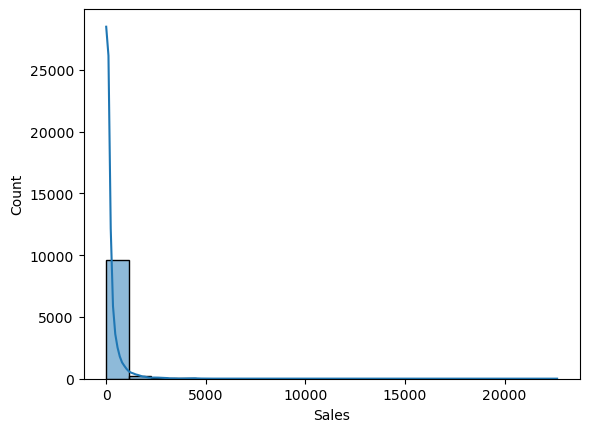

In [47]:
sns.histplot(df['Sales'],kde=True,bins=20)

print("Skewness: %f" % df['Sales'].skew())
print("Kurtosis: %f" % df['Sales'].kurt())

In [48]:
obj_train=df.columns[df.dtypes=='object']
cat=df[obj_train]
cat

Ship Mode    Segment             City       State Region  \
0       Second Class   Consumer        Henderson    Kentucky  South   
1       Second Class   Consumer        Henderson    Kentucky  South   
2       Second Class  Corporate      Los Angeles  California   West   
3     Standard Class   Consumer  Fort Lauderdale     Florida  South   
4     Standard Class   Consumer  Fort Lauderdale     Florida  South   
...              ...        ...              ...         ...    ...   
9989    Second Class   Consumer            Miami     Florida  South   
9990  Standard Class   Consumer       Costa Mesa  California   West   
9991  Standard Class   Consumer       Costa Mesa  California   West   
9992  Standard Class   Consumer       Costa Mesa  California   West   
9993    Second Class   Consumer      Westminster  California   West   

             Category Sub-Category  
0           Furniture    Bookcases  
1           Furniture       Chairs  
2     Office Supplies       Labels  
3           Furniture       Tables  
4     Office Supplies      Storage  
...               ...          ...  
9989        Furniture  Furnishings  
9990        Furniture  Furnishings  
9991       Technology       Phones  
9992  Office Supplies        Paper  
9993  Office Supplies   Appliances  

[9994 rows x 7 columns]

In [49]:
df['city_encoded']= df.groupby('City')['Sales'].transform('mean')

In [50]:
df.head(2)

Order Date     Ship Mode   Segment       City     State Region   Category  \
0 2013-11-09  Second Class  Consumer  Henderson  Kentucky  South  Furniture   
1 2013-11-09  Second Class  Consumer  Henderson  Kentucky  South  Furniture   

  Sub-Category   Sales  Quantity  Discount    Profit  order year  loss  \
0    Bookcases  261.96         2       0.0   41.9136        2013   0.0   
1       Chairs  731.94         3       0.0  219.5820        2013   0.0   

   profit margin  city_encoded  
0           0.16    344.099373  
1           0.30    344.099373

In [51]:
# Find most important features relative to Sales
print("Find most important features relative to Sales")
num_data=df.select_dtypes(['float','int'])
corr = num_data.corr()
corr.sort_values(["Sales"], ascending = False, inplace = True)
print(corr.Sales)


Find most important features relative to Sales
Sales            1.000000
Profit           0.479064
loss             0.265285
Quantity         0.200795
city_encoded     0.189521
profit margin    0.003444
order year      -0.009800
Discount        -0.028190
Name: Sales, dtype: float64


<Axes: >

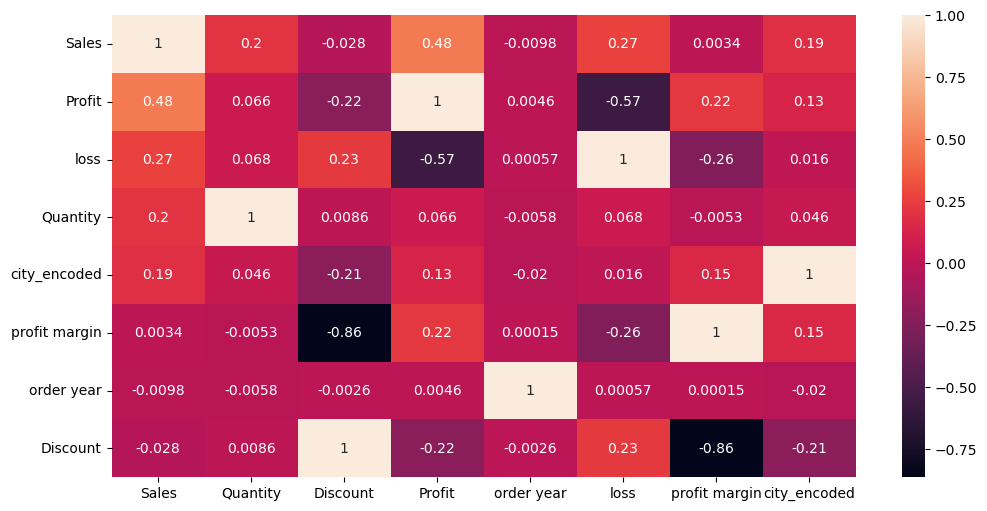

In [52]:
plt.figure(figsize=(12,6))
sns.heatmap(corr,annot=True,)

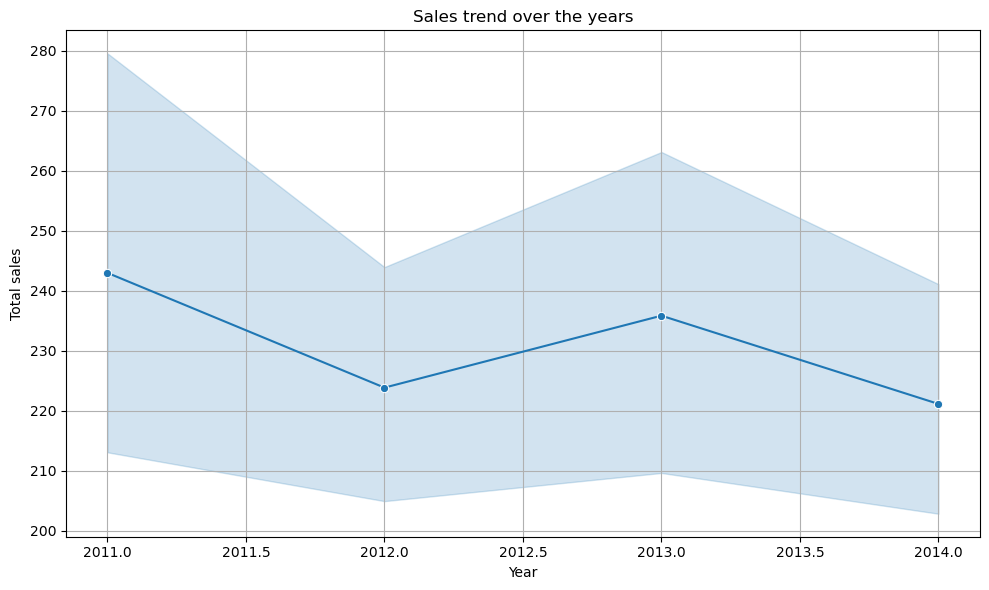

In [53]:
plt.figure(figsize= (10,6))
sns.lineplot(data= df, x='order year', y= 'Sales', marker='o')
plt.title("Sales trend over the years")
plt.xlabel('Year')
plt.ylabel('Total sales')
plt.grid(True)
plt.tight_layout()
plt.show()

In [27]:
#pip install wordcloud
#from wordcloud import wordCloud

In [54]:
df= df.drop('Order Date', axis=1)

In [55]:
df.head()

Ship Mode    Segment             City       State Region  \
0    Second Class   Consumer        Henderson    Kentucky  South   
1    Second Class   Consumer        Henderson    Kentucky  South   
2    Second Class  Corporate      Los Angeles  California   West   
3  Standard Class   Consumer  Fort Lauderdale     Florida  South   
4  Standard Class   Consumer  Fort Lauderdale     Florida  South   

          Category Sub-Category     Sales  Quantity  Discount    Profit  \
0        Furniture    Bookcases  261.9600         2      0.00   41.9136   
1        Furniture       Chairs  731.9400         3      0.00  219.5820   
2  Office Supplies       Labels   14.6200         2      0.00    6.8714   
3        Furniture       Tables  957.5775         5      0.45 -383.0310   
4  Office Supplies      Storage   22.3680         2      0.20    2.5164   

   order year     loss  profit margin  city_encoded  
0        2013    0.000         0.1600    344.099373  
1        2013    0.000         0.3000    344.099373  
2        2013    0.000         0.4700    235.410095  
3        2012  383.031        -0.4000    328.635500  
4        2012    0.000         0.1125    328.635500

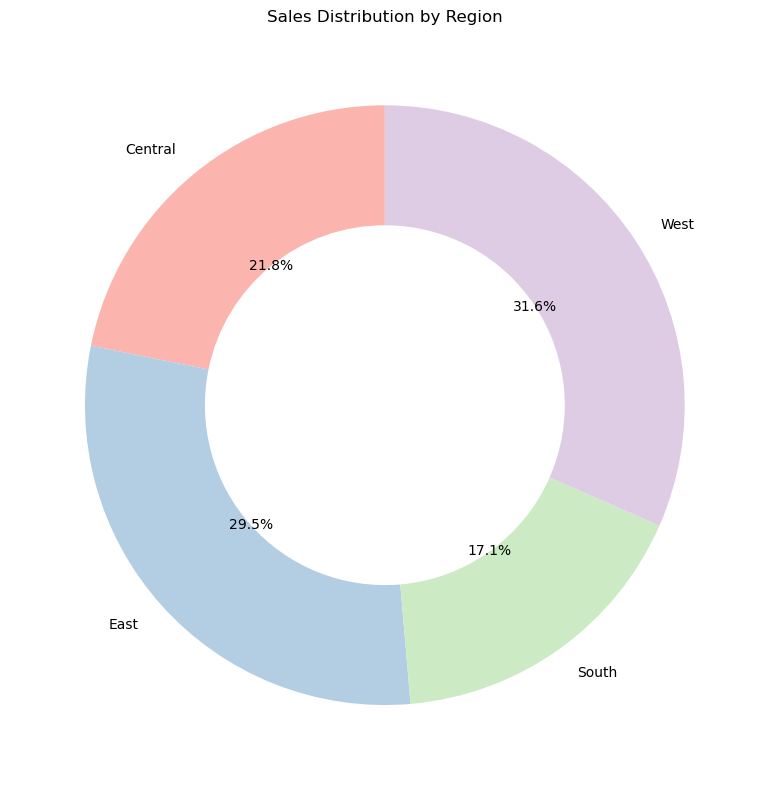

In [56]:
region_sales= df.groupby('Region')['Sales'].sum().reset_index()
plt.figure(figsize=(8,8))
colors = plt.cm.Pastel1.colors
plt.pie(region_sales['Sales'],
       labels= region_sales['Region'],
       autopct='%1.1f%%',
       startangle=90, colors=colors, wedgeprops={'width': 0.4})
centre_circle= plt.Circle((0,0), 0.20, fc='white')
plt.gca().add_artist(centre_circle)

plt.title('Sales Distribution by Region')
plt.tight_layout()
plt.show()

In [58]:
agg_df = df.groupby(['Category','Sub-Category'])['Sales'].sum().reset_index()
agg_df

Category Sub-Category        Sales
0         Furniture    Bookcases  114879.9963
1         Furniture       Chairs  328449.1030
2         Furniture  Furnishings   91705.1640
3         Furniture       Tables  206965.5320
4   Office Supplies   Appliances  107532.1610
5   Office Supplies          Art   27118.7920
6   Office Supplies      Binders  203412.7330
7   Office Supplies    Envelopes   16476.4020
8   Office Supplies    Fasteners    3024.2800
9   Office Supplies       Labels   12486.3120
10  Office Supplies        Paper   78479.2060
11  Office Supplies      Storage  223843.6080
12  Office Supplies     Supplies   46673.5380
13       Technology  Accessories  167380.3180
14       Technology      Copiers  149528.0300
15       Technology     Machines  189238.6310
16       Technology       Phones  330007.0540

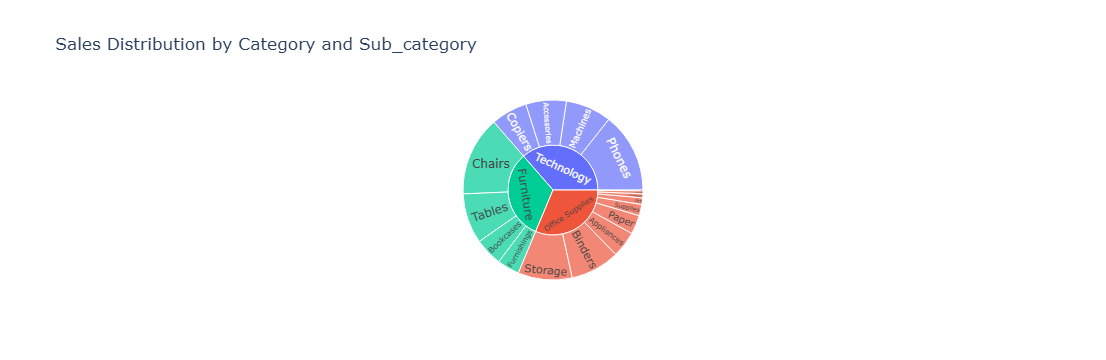

In [59]:
fig = px.sunburst(agg_df, path=['Category','Sub-Category'],values= 'Sales', 
                  color='Category',title= 'Sales Distribution by Category and Sub_category')
fig.show()

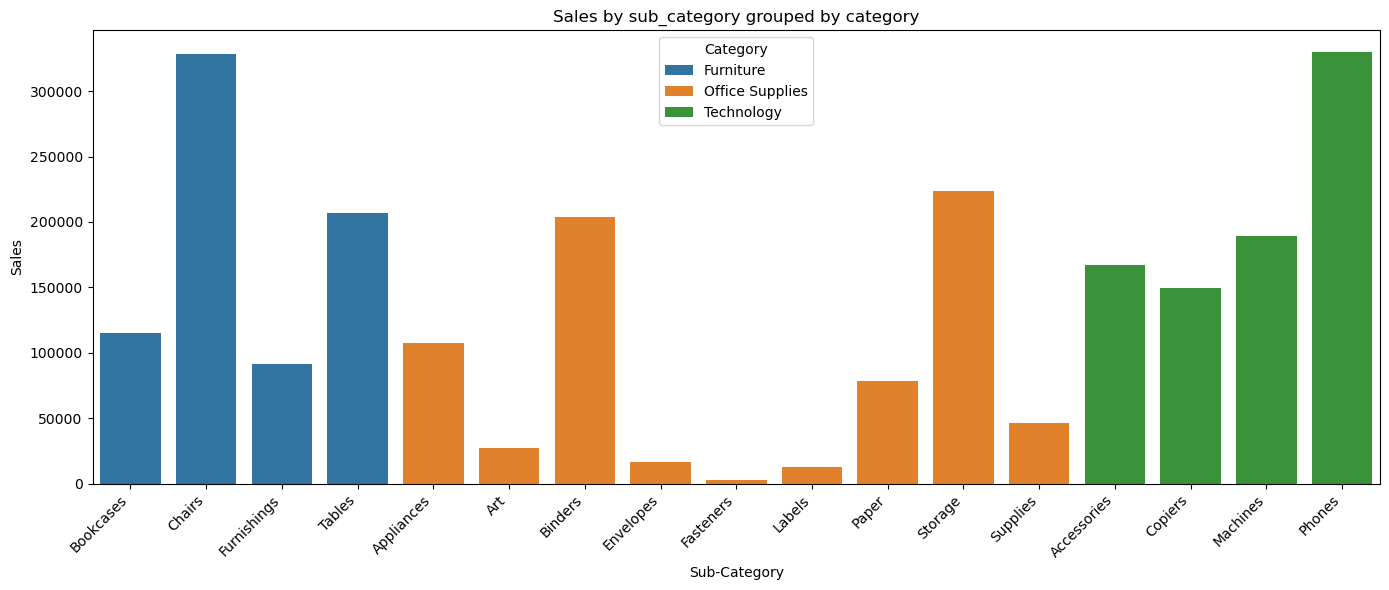

In [60]:
plt.figure(figsize=(14, 6))
sns.barplot(data=agg_df, x= 'Sub-Category', y='Sales', hue='Category')
plt.xticks(rotation= 45, ha='right')
plt.title('Sales by sub_category grouped by category')
plt.tight_layout()
plt.show()

In [61]:
df.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit', 'order year',
       'loss', 'profit margin', 'city_encoded'],
      dtype='object')

In [62]:
segment_sales = df.groupby('Segment')['Sales'].sum().reset_index()


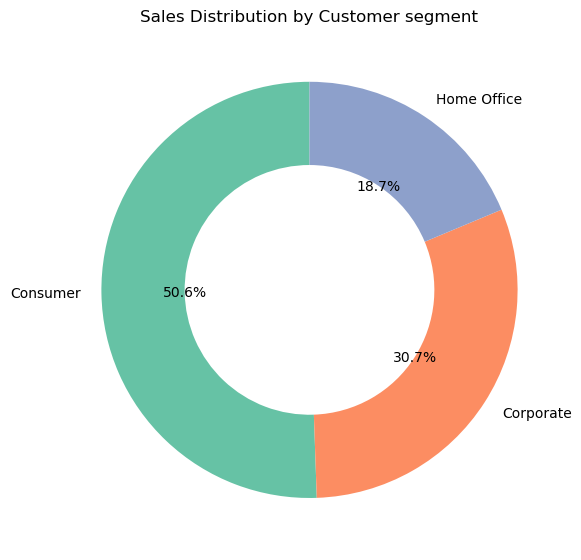

In [63]:
plt.figure(figsize=(6,6))
colors = plt.cm.Set2.colors
plt.pie(segment_sales['Sales'],
       labels= segment_sales['Segment'],
       autopct='%1.1f%%',
       startangle=90, colors=colors, wedgeprops={'width': 0.4})
centre_circle= plt.Circle((0,0), 0.20, fc='white')
plt.gca().add_artist(centre_circle)

plt.title('Sales Distribution by Customer segment')
plt.tight_layout()
plt.show()

In [64]:
df.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit', 'order year',
       'loss', 'profit margin', 'city_encoded'],
      dtype='object')

In [65]:
df['City'].unique()

array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
       'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco',
       'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson',
       'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover',
       'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert',
       'Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham',
       'Columbia', 'Rochester', 'Minneapolis', 'Portland', 'Saint Paul',
       'Aurora', 'Charlotte', 'Orland Park', 'Urbandale', 'Columbus',
       'Bristol', 'Wilmington', 'Bloomington', 'Phoenix', 'Roseville',
       'Independence', 'Pasadena', 'Newark', 'Franklin', 'Scottsdale',
       'San Jose', 'Edmond', 'Carlsbad', 'San Antonio', 'Monroe',
       'Fairfield', 'Grand Prairie', 'Redlands', 'Hamilton', 'Westfield',
       'Akron', 'Denver', 'Dallas', 'Whittier', 'Saginaw', 'Medina',
       'Dublin', 'Detroit', 'Tampa', 'Santa Clara', 'Lakeville',
       'San Diego', 'Brentwood', 'Cha

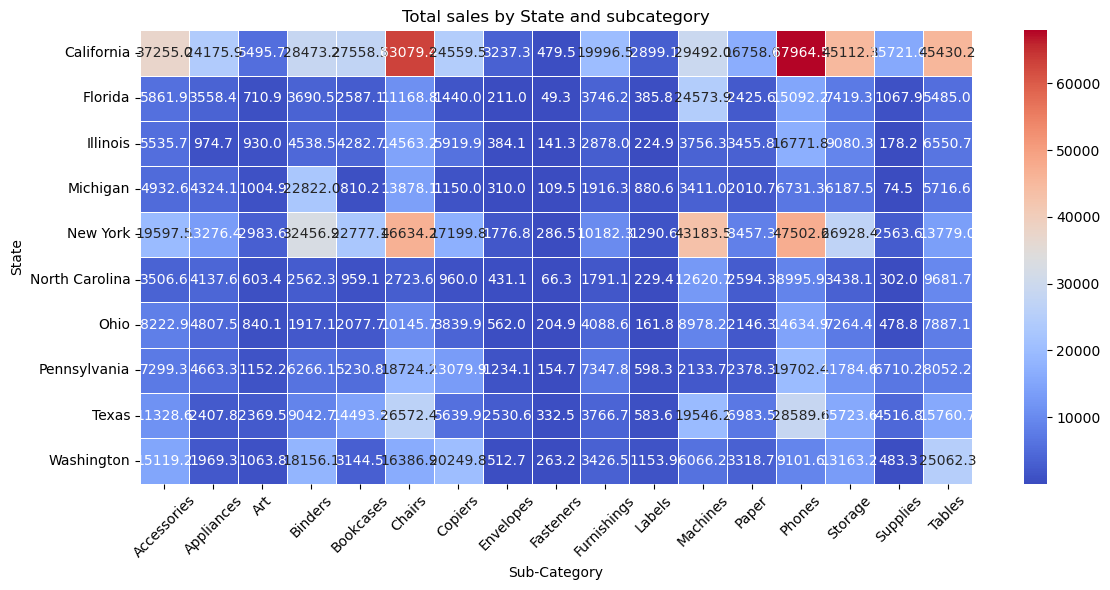

In [66]:
top_State= df['State'].value_counts().nlargest(10).index
filtered_df= df[df['State'].isin (top_State)]
pivot_table= filtered_df.pivot_table(values= 'Sales', index='State', columns='Sub-Category', aggfunc= 'sum', fill_value=0)

plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, annot= True, fmt='.1f', cmap='coolwarm', linewidths=0.5)
plt.title("Total sales by State and subcategory")
plt.xlabel("Sub-Category")
plt.ylabel("State")
plt.xticks(rotation=45)
plt.yticks(rotation=360)
plt.tight_layout()
plt.show()


In [67]:
df['State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [68]:
loss_by_state = df.groupby("State")['loss'].sum().sort_values(ascending=False)

C:\Users\User\AppData\Local\Temp\ipykernel_5724\423117642.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




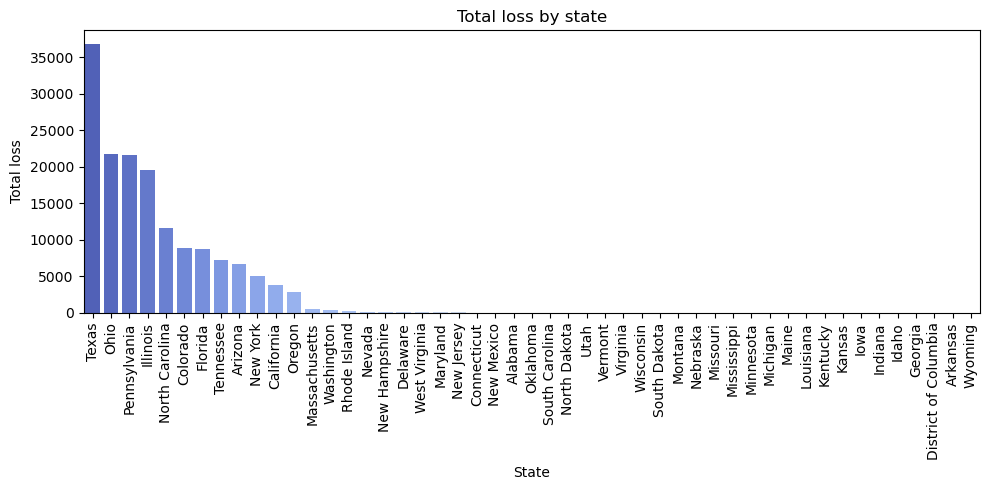

In [69]:
plt.figure(figsize=(10, 5))
sns.barplot(x=loss_by_state.index, y=loss_by_state.values,palette='coolwarm')
plt.title('Total loss by state')
plt.xlabel('State')
plt.ylabel('Total loss')
plt.xticks(rotation=90)
plt.tight_layout()

>There are making a lot of sales in california,newyork,texas nut at the same time they are running at loss\
>i noticed that the state that is making sale are also the once running into loss\
>hence we are goin to investiga the discount

C:\Users\User\AppData\Local\Temp\ipykernel_5724\242063304.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




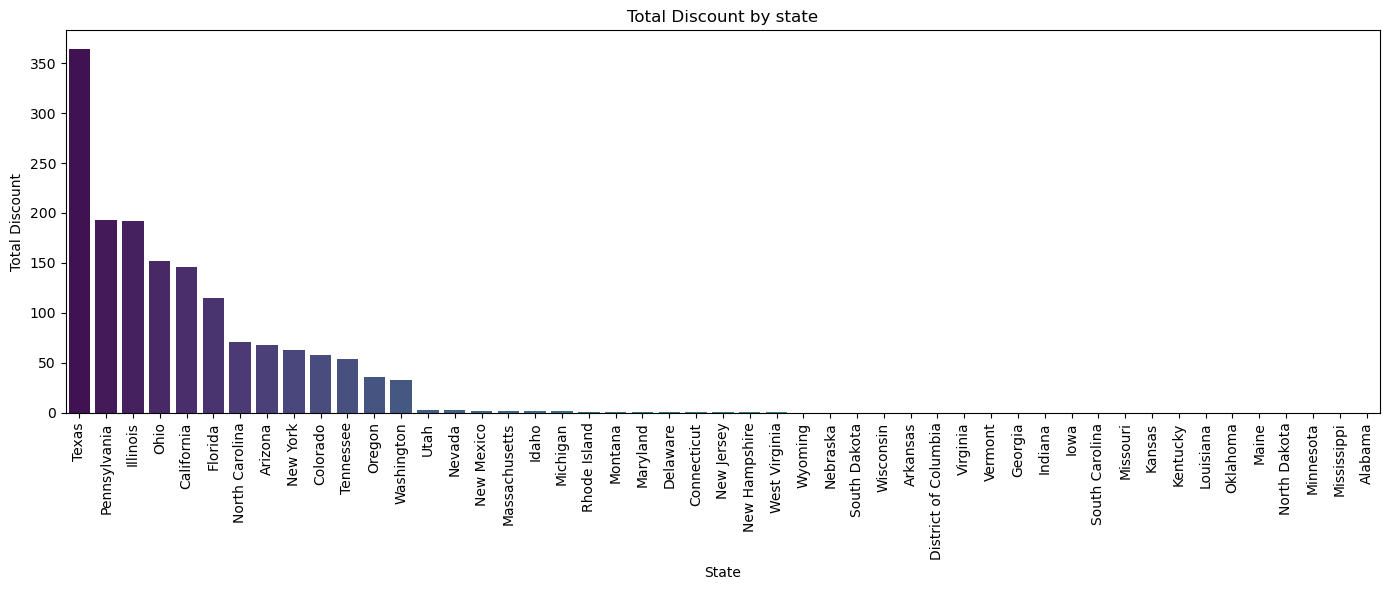

In [70]:
discount_by_state= df.groupby("State")["Discount"].sum().sort_values(ascending=False)
plt.figure(figsize=(14,6))
sns.barplot(x=discount_by_state.index, y=discount_by_state.values, palette='viridis')
plt.title('Total Discount by state')
plt.xlabel('State')
plt.ylabel('Total Discount')
plt.xticks(rotation=90)
plt.tight_layout()

> it is obvious that the discount is the main reason for loss
if these discounts are reduced or completely removed, then the company will stop running into a loss
however, should the discount be removed it is possible that the sales wont be as much as it used to be in those state
it is important we review th ereason for the discount and see if the company can afford to do away with these states

In [71]:
num_train=df.select_dtypes(['int','float'])
num_train.corr()

Sales  Quantity  Discount    Profit  order year      loss  \
Sales          1.000000  0.200795 -0.028190  0.479064   -0.009800  0.265285   
Quantity       0.200795  1.000000  0.008623  0.066253   -0.005788  0.067588   
Discount      -0.028190  0.008623  1.000000 -0.219487   -0.002615  0.231767   
Profit         0.479064  0.066253 -0.219487  1.000000    0.004618 -0.566495   
order year    -0.009800 -0.005788 -0.002615  0.004618    1.000000  0.000570   
loss           0.265285  0.067588  0.231767 -0.566495    0.000570  1.000000   
profit margin  0.003444 -0.005280 -0.864452  0.223732    0.000147 -0.256738   
city_encoded   0.189521  0.046397 -0.213098  0.126579   -0.019613  0.016156   

               profit margin  city_encoded  
Sales               0.003444      0.189521  
Quantity           -0.005280      0.046397  
Discount           -0.864452     -0.213098  
Profit              0.223732      0.126579  
order year          0.000147     -0.019613  
loss               -0.256738      0.016156  
profit margin       1.000000      0.149671  
city_encoded        0.149671      1.000000

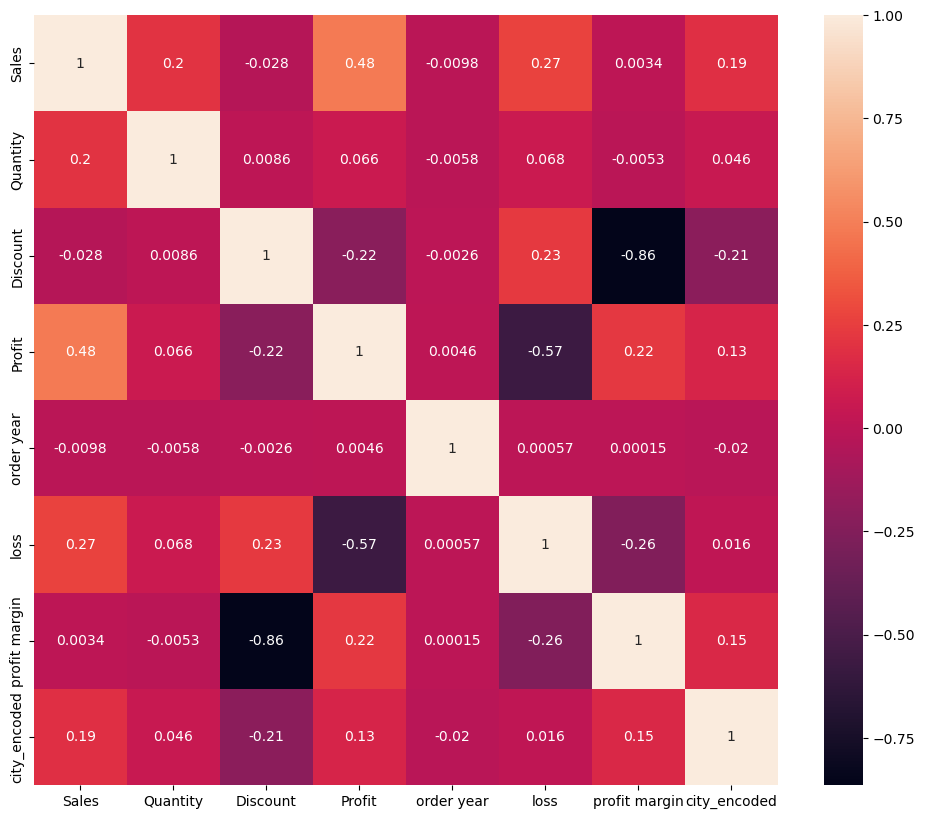

In [72]:
plt.figure(figsize = (12,10))

sns.heatmap(num_train.corr(), annot =True)
plt.show()

In [73]:
# preparing for regression

In [74]:
obj_train=df.columns[df.dtypes=='object']
cat=df[obj_train]
cat

Ship Mode    Segment             City       State Region  \
0       Second Class   Consumer        Henderson    Kentucky  South   
1       Second Class   Consumer        Henderson    Kentucky  South   
2       Second Class  Corporate      Los Angeles  California   West   
3     Standard Class   Consumer  Fort Lauderdale     Florida  South   
4     Standard Class   Consumer  Fort Lauderdale     Florida  South   
...              ...        ...              ...         ...    ...   
9989    Second Class   Consumer            Miami     Florida  South   
9990  Standard Class   Consumer       Costa Mesa  California   West   
9991  Standard Class   Consumer       Costa Mesa  California   West   
9992  Standard Class   Consumer       Costa Mesa  California   West   
9993    Second Class   Consumer      Westminster  California   West   

             Category Sub-Category  
0           Furniture    Bookcases  
1           Furniture       Chairs  
2     Office Supplies       Labels  
3           Furniture       Tables  
4     Office Supplies      Storage  
...               ...          ...  
9989        Furniture  Furnishings  
9990        Furniture  Furnishings  
9991       Technology       Phones  
9992  Office Supplies        Paper  
9993  Office Supplies   Appliances  

[9994 rows x 7 columns]

In [75]:
from sklearn.preprocessing import LabelEncoder
Lenc = LabelEncoder()
for i in obj_train:
    cat[i] = Lenc.fit_transform(cat[[i]])

C:\Users\User\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\User\AppData\Local\Temp\ipykernel_5724\4003383086.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\User\AppData\Local\Temp\ipykernel_5724\4003383086.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [76]:
# encoding the ategorical column
cat

Ship Mode  Segment  City  State  Region  Category  Sub-Category
0             2        0   194     15       2         0             4
1             2        0   194     15       2         0             5
2             2        1   266      3       3         1            10
3             3        0   153      8       2         0            16
4             3        0   153      8       2         1            14
...         ...      ...   ...    ...     ...       ...           ...
9989          2        0   295      8       2         0             9
9990          3        0   104      3       3         0             9
9991          3        0   104      3       3         2            13
9992          3        0   104      3       3         1            12
9993          2        0   517      3       3         1             1

[9994 rows x 7 columns]

In [77]:
num_train=df.columns[df.dtypes!='object']
num=df[num_train]

In [78]:
new_df=pd.concat((num,cat),axis=1)

In [79]:
new_df

Sales  Quantity  Discount    Profit  order year     loss  \
0     261.9600         2      0.00   41.9136        2013    0.000   
1     731.9400         3      0.00  219.5820        2013    0.000   
2      14.6200         2      0.00    6.8714        2013    0.000   
3     957.5775         5      0.45 -383.0310        2012  383.031   
4      22.3680         2      0.20    2.5164        2012    0.000   
...        ...       ...       ...       ...         ...      ...   
9989   25.2480         3      0.20    4.1028        2011    0.000   
9990   91.9600         2      0.00   15.6332        2014    0.000   
9991  258.5760         2      0.20   19.3932        2014    0.000   
9992   29.6000         4      0.00   13.3200        2014    0.000   
9993  243.1600         2      0.00   72.9480        2014    0.000   

      profit margin  city_encoded  Ship Mode  Segment  City  State  Region  \
0            0.1600    344.099373          2        0   194     15       2   
1            0.3000    344.099373          2        0   194     15       2   
2            0.4700    235.410095          2        1   266      3       3   
3           -0.4000    328.635500          3        0   153      8       2   
4            0.1125    328.635500          3        0   153      8       2   
...             ...           ...        ...      ...   ...    ...     ...   
9989         0.1625    152.159202          2        0   295      8       2   
9990         0.1700    136.151818          3        0   104      3       3   
9991         0.0750    136.151818          3        0   104      3       3   
9992         0.4500    136.151818          3        0   104      3       3   
9993         0.3000    225.096824          2        0   517      3       3   

      Category  Sub-Category  
0            0             4  
1            0             5  
2            1            10  
3            0            16  
4            1            14  
...        ...           ...  
9989         0             9  
9990         0             9  
9991         2            13  
9992         1            12  
9993         1             1  

[9994 rows x 15 columns]

In [80]:
y= new_df['Sales']
x= new_df.drop(['Sales'], axis=1)


In [81]:
def Definedata(Data):
    y= new_df['Sales']
    x= new_df.drop('Sales', axis=1)
    return x, y


In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0, test_size=0.2)


In [83]:
def Models(models):
    
    model = models
    x,y = Definedata(x_train)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 25)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_total = model.predict(x)
    
    
    print("\t\tError Table")
    print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('Accuracy on Traing set   : ', model.score(x_train,y_train))
    print('Accuracy on Testing set  : ', model.score(x_test,y_test))
    return y_total, y


In [84]:
results_df = pd.DataFrame(columns=['model', 'Root Mean Squared Error', 'Accuracy on Training set', 'Accuracy on Testing set'])


In [85]:
regressors = [['LInear Regression',LinearRegression()],
              ['DecisionTreeRegressor',DecisionTreeRegressor()],
              ['RandomForestRegressor', RandomForestRegressor()],
              ['MLPRegressor',MLPRegressor()],
              ['AdaBoostRegressor',AdaBoostRegressor()],
              ['ExtraTreesRegressor',ExtraTreesRegressor()]]


# Loop through each model in regressors
for mod in regressors:
    name = mod[0]
    model = mod[1]
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # Calculate metrics
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    ATrS = model.score(x_train, y_train)
    ATeS = model.score(x_test, y_test)
    
    # Store the results in the DataFrame
    results_df = pd.concat([results_df, pd.DataFrame([{
        'model': name, 
        'Root Mean Squared Error': RMSE,
        'Accuracy on Training set': ATrS,
        'Accuracy on Testing set': ATeS
    }])], ignore_index=True)

C:\Users\User\AppData\Local\Temp\ipykernel_5724\187141088.py:22: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



In [86]:
results_df

model  Root Mean Squared Error  Accuracy on Training set  \
0      LInear Regression               285.027531                  0.614438   
1  DecisionTreeRegressor               283.732673                  1.000000   
2  RandomForestRegressor               234.833057                  0.975886   
3           MLPRegressor               250.552220                  0.682879   
4      AdaBoostRegressor               498.010378                  0.468871   
5    ExtraTreesRegressor               217.839557                  1.000000   

   Accuracy on Testing set  
0                 0.834005  
1                 0.835510  
2                 0.887322  
3                 0.871732  
4                 0.493244  
5                 0.903039

In [87]:
ETR= ExtraTreesRegressor()

In [88]:
def Featureimportances(models,data):
    model = models
    x,y = Definedata(data)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 25)
    model.fit(x_train,y_train)
    importances = model.feature_importances_
    features = x_test.columns
    imp = pd.DataFrame({'Features': features, 'Importance': importances})
    imp['Sum Importance'] = imp['Importance'].cumsum()
    imp = imp.sort_values(by = 'Importance',ascending=False)
    return imp

In [89]:
imp=Featureimportances(ETR, new_df)

In [90]:
imp

Features  Importance  Sum Importance
2          Profit    0.606804        0.674948
5   profit margin    0.100783        0.849485
4            loss    0.064097        0.748703
1        Discount    0.040815        0.068145
13   Sub-Category    0.038177        1.000000
12       Category    0.035112        0.961823
0        Quantity    0.027330        0.027330
10          State    0.018469        0.920614
6    city_encoded    0.017942        0.867427
8         Segment    0.017168        0.890765
9            City    0.011380        0.902145
3      order year    0.009657        0.684606
7       Ship Mode    0.006170        0.873597
11         Region    0.006096        0.926711

In [91]:
def Graph_prediction(n, y_actual, y_predicted):
    y = y_actual
    y_total = y_predicted
    number = n
    aa=[x for x in range(number)]
    plt.figure(figsize=(25,10)) 
    plt.plot(aa, y[:number], marker='.', label="actual")
    plt.plot(aa, y_total[:number], 'ro', label="prediction")
    plt.xlabel('Sales prediction of superstore in US'.format(number), size=15)
    plt.legend(fontsize=15)
    plt.show()

In [92]:
ETR_pred=ETR.predict(x_test)

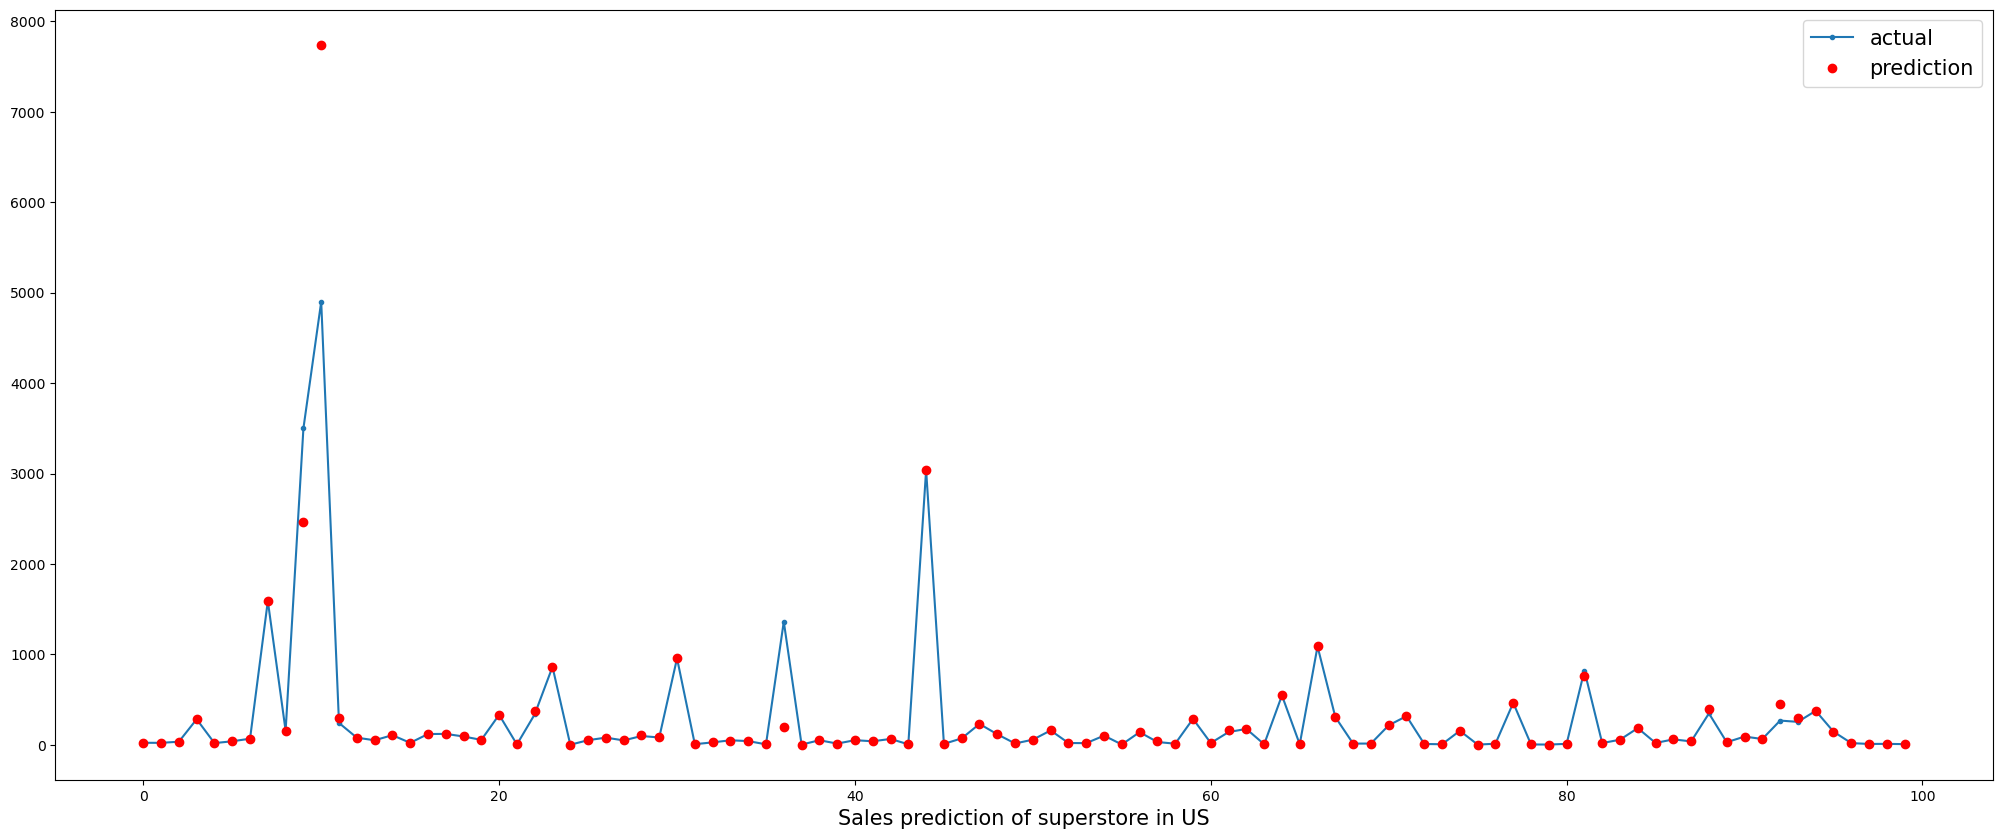

In [67]:
Graph_prediction(100,y_test,ETR_pred)

In [68]:
import joblib
joblib.dump(ETR, 'ETR.pkl')

['ETR.pkl']